DATA LOADING AND INSPECTION
-----------

In [1]:
#Importing libraries

#Packages for numeric
import pandas as pd
import numpy as np

#Packages for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold, KFold
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report, accuracy_score,log_loss# performance metrics
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler


#Classifier module
from sklearn.naive_bayes import GaussianNB

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data.
telecom = pd.read_csv('tele-churn.csv')

Data Preprocessing
-----------
Encoding
-------

In [3]:
#Removing the phone number and state column
df1 = telecom.drop(['phone number', 'state', 'area code'], axis=1)

# change categorical data into numerical data
df1['international plan'] = df1['international plan'].map({'no': 0, 'yes': 1})
df1['voice mail plan'] = df1['voice mail plan'].map({'no': 0, 'yes': 1})
df1['churn'] = df1['churn'].map({False : 0, True : 1})

FEATURES SCALING / STANDARDIZATION
------------

In [4]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Define function for scaling a column
def scaling(column):
    return scaler.fit_transform(df1[[column]])

# Iterate through numerical columns and scale them
for column in df1.select_dtypes(include=[np.number]).columns:
    df1[[column]] = scaling(column)

In [5]:
# Creating a Test and Train Dataset
y = df1['churn']
X = df1.drop(['churn'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

# Check the shapes of the split dataprint("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Train set size:", y_train.shape)
print("Test set size:", y_test.shape)

Test set size: (600, 17)
Train set size: (2733,)
Test set size: (600,)


SMOTE
--------

In [6]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
# Resample the training data

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the shape of the resampled data
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("\nValue counts of y_train_resampled:\n", y_train_resampled.value_counts())

Shape of X_train_resampled: (4676, 17)

Value counts of y_train_resampled:
 churn
0.0    2338
1.0    2338
Name: count, dtype: int64


DATA MODELING
-----
NAIVE BAYES CLASSIFIER
-------

In [7]:
#Initialize the Gradient Boosting model
nb =  GaussianNB()

#Train the model
nb.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred_nb = nb.predict(X_test)

#Evaluate the model
accuracy= accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)
auc_roc = roc_auc_score(y_test, y_pred_nb)
print(f" Naive Bayes accuracy: {accuracy :.4f}")
print(f"Naive Bayes precision: {precision :.4f}")
print(f" Naive Bayes recall: {recall :.4f}")
print(f" Naive Bayes f1_score: {f1 :.4f}")
print(f" Naive Bayes auc_roc: {auc_roc :.4f}")
print(classification_report(y_test, y_pred_nb))
print ("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("ROC AUC Score:", roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1]))


print("Training Accuracy :", nb.score(X_train, y_train))
print("Training Resampled Accuracy :", nb.score(X_train_resampled, y_train_resampled))
print("Testing Accuracy :", nb.score(X_test, y_test))

 Naive Bayes accuracy: 0.7933
Naive Bayes precision: 0.3953
 Naive Bayes recall: 0.7727
 Naive Bayes f1_score: 0.5231
 Naive Bayes auc_roc: 0.7848
              precision    recall  f1-score   support

         0.0       0.95      0.80      0.87       512
         1.0       0.40      0.77      0.52        88

    accuracy                           0.79       600
   macro avg       0.67      0.78      0.70       600
weighted avg       0.87      0.79      0.82       600

Confusion Matrix:
 [[408 104]
 [ 20  68]]
ROC AUC Score: 0.8153852982954546
Training Accuracy : 0.7925356750823271
Training Resampled Accuracy : 0.8021813515825492
Testing Accuracy : 0.7933333333333333


CONFUSION MATRIX
-----------

In [8]:
pred_nb = nb.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_nb).ravel()

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 68
False positives: 104
True negatives: 408
False negatives: 20



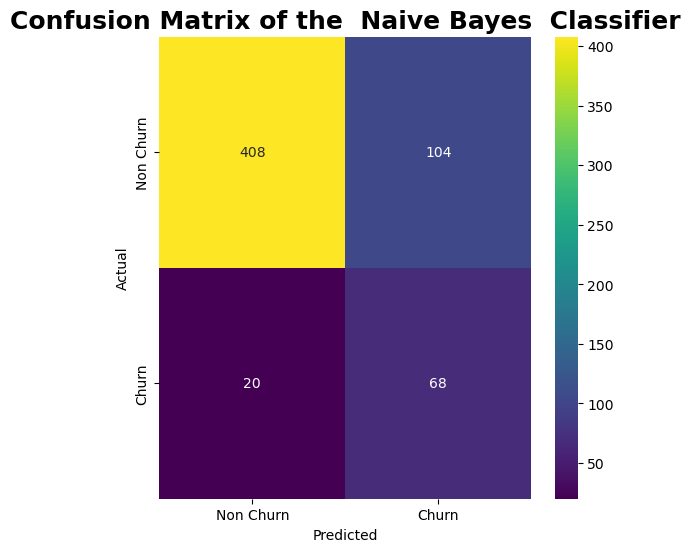

In [9]:
cm = confusion_matrix(y_test, y_pred_nb)

#Visualize the Matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d',
            xticklabels=['Non Churn', 'Churn'],
            yticklabels=['Non Churn', 'Churn'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the  Naive Bayes  Classifier', size=18, color='black', fontweight= 'bold')
plt.show()

EVALUATION OF THE MACHINE LEARNING ALGORITHMS
-----------

In [10]:
final_data = pd.DataFrame({"ALGORITHMS":["Naive Bayes Classifier"], 
                           "ACCURACY":[accuracy_score(y_test, y_pred_nb)*100],
                         "PRECISION":[precision_score(y_test, y_pred_nb)*100],
                          "RECALL":[recall_score(y_test, y_pred_nb)*100],
                          "F1_SCORE":[f1_score(y_test, y_pred_nb)*100], 
                            "ROC_AUC":[roc_auc_score(y_test, y_pred_nb)*100], 
                           
                        })

final_data

,ALGORITHMS,ACCURACY,PRECISION,RECALL,F1_SCORE,ROC_AUC
0,Naive Bayes Classifier,79.333333,39.534884,77.272727,52.307692,78.480114


K_FOLD CROSS VALIDATION¶
------------

ACCURACY
-------

In [11]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
nb_accuracies = cross_val_score(nb, X_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')
print(nb_accuracies)
nb_avg_accuracy = np.mean(nb_accuracies)
nb_std_accuracy = np.std(nb_accuracies)
print(f"The std score of cross validation using NaiveBayes algorithm is {nb_std_accuracy * 100:.2f}%")
print(f"The mean score of cross validation using NaiveBayes algorithm is {nb_avg_accuracy * 100:.2f}%")

[0.79700855 0.77564103 0.80982906 0.78846154 0.8034188  0.79700855
 0.82012848 0.78800857 0.81156317 0.79443255]
The std score of cross validation using NaiveBayes algorithm is 1.24%
The mean score of cross validation using NaiveBayes algorithm is 79.86%


PRECISION
----------

In [12]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
nb_precision = cross_val_score(nb, X_train_resampled, y_train_resampled, cv=kf, scoring='precision')
print(nb_precision)
nb_avg_precision = np.mean(nb_precision)
nb_std_precision = np.std(nb_precision)
print(f"The std score of cross validation using NaiveBayes algorithm is {nb_std_precision * 100:.2f}%")
print(f"The mean score of cross validation using NaiveBayes algorithm is {nb_avg_precision * 100:.2f}%")

[0.8008658  0.7611336  0.80082988 0.77777778 0.78861789 0.79574468
 0.81974249 0.7887931  0.82589286 0.7875    ]
The std score of cross validation using NaiveBayes algorithm is 1.79%
The mean score of cross validation using NaiveBayes algorithm is 79.47%


RECALL
----------

In [13]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
nb_recall = cross_val_score(nb, X_train_resampled, y_train_resampled, cv=kf, scoring='recall')
print(nb_recall)
nb_avg_recall = np.mean(nb_recall)
nb_std_recall = np.std(nb_recall)
print(f"The std score of cross validation using NaiveBayes algorithm is {nb_std_recall * 100:.2f}%")
print(f"The mean score of cross validation using NaiveBayes algorithm is {nb_avg_recall * 100:.2f}%")

[0.79059829 0.8034188  0.82478632 0.80769231 0.82905983 0.7991453
 0.81974249 0.78540773 0.79059829 0.80769231]
The std score of cross validation using NaiveBayes algorithm is 1.43%
The mean score of cross validation using NaiveBayes algorithm is 80.58%


F1_SCORE
----

In [14]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
nb_f1 = cross_val_score(nb, X_train_resampled, y_train_resampled, cv=kf, scoring='f1')
print(nb_f1)
nb_avg_f1 = np.mean(nb_f1)
nb_std_f1 = np.std(nb_f1)
print(f"The std score of cross validation using NaiveBayes algorithm is {nb_std_f1 * 100:.2f}%")
print(f"The mean score of cross validation using NaiveBayes algorithm is {nb_avg_f1 * 100:.2f}%")

[0.79569892 0.78170478 0.81263158 0.79245283 0.80833333 0.79744136
 0.81974249 0.78709677 0.80786026 0.79746835]
The std score of cross validation using NaiveBayes algorithm is 1.13%
The mean score of cross validation using NaiveBayes algorithm is 80.00%


CHECKING IF IT IS OVERFITTING OR NOT
--------------

In [15]:
if nb_avg_accuracy > accuracy:
    print("Model generalizes well: Cross_validation accuracy is higher or close to test accuracy")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than test accuracy")

Model generalizes well: Cross_validation accuracy is higher or close to test accuracy


In [16]:
if nb_avg_precision > precision:
    print("Model generalizes well: Cross_validation accuracy is higher or close to test precision")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than test precision")

Model generalizes well: Cross_validation accuracy is higher or close to test precision


In [17]:
if nb_avg_recall > recall:
    print("Model generalizes well: Cross_validation accuracy is higher or close to test recall")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than test recall")

Model generalizes well: Cross_validation accuracy is higher or close to test recall


In [18]:
if nb_avg_f1 > f1:
    print("Model generalizes well: Cross_validation accuracy is higher or close to test f1_score")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than test f1_score")

Model generalizes well: Cross_validation accuracy is higher or close to test f1_score


Total KFold Validation
-------------

In [19]:
final_kfold = pd.DataFrame({"ALGORITHMS":["Naive Bayes Classifier"], 
                           "ACCURACY":[nb_avg_accuracy * 100],
                         "PRECISION":[nb_avg_precision * 100],
                          "RECALL":[nb_avg_recall * 100],
                          "F1_SCORE":[nb_avg_f1 * 100],  
                           
                        })

final_kfold

,ALGORITHMS,ACCURACY,PRECISION,RECALL,F1_SCORE
0,Naive Bayes Classifier,79.855003,79.468981,80.581417,80.004307
